In [46]:
import re
import string

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline
import matplotlib.pyplot as plt
from nltk import bigrams
from nltk import trigrams
import spacy
import networkx as nx


In [47]:
def generate_word_cloud(dic):
    wc = WordCloud(
            background_color='white',
            width=800,
            height=400,
            max_words=200)\
        .generate_from_frequencies(dic)

    plt.figure(figsize=(25, 25))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [48]:
nlp = spacy.load('es_core_news_sm')

In [49]:
institutions = pd.read_excel('data/ELA - Instituciones.xlsx')

In [50]:
institutions = institutions[institutions["categoria"] == "Fuerzas Armadas"]

In [51]:
institutions['fundamento'] = institutions['fundamento'].str.lower()
institutions['fundamento'] = institutions['fundamento'].apply(lambda x: re.sub("[0-9]", '', x))
institutions['fundamento'] = institutions['fundamento'].str.translate(str.maketrans(' ', ' ', string.punctuation))
institutions['fundamento'] = institutions['fundamento'].str.strip()
institutions['fundamento'] = institutions['fundamento'].str.replace('\n',' ')
institutions['fundamento'] = institutions['fundamento'].str.replace('  ',' ')
institutions['fundamento'] = institutions['fundamento'].str.replace('   ',' ')
institutions['fundamento'] = institutions['fundamento'].str.replace('    ',' ')
institutions['fundamento'] = institutions['fundamento'].str.replace('     ',' ')

institutions = institutions[[len(x.split()) > 2  for x in institutions.fundamento]]
institutions = institutions.reset_index(drop=True)

In [52]:
institutions.head()

categoria                                         fundamento
0  Fuerzas Armadas            para mantener orden seguridad y respeto
1  Fuerzas Armadas  que estén sometidas a la justicia civil que se...
2  Fuerzas Armadas  fundamentales para el resguardo de la soberaní...
3  Fuerzas Armadas  creemos que son necesarias para la defensa de ...
4  Fuerzas Armadas  redefinir el rol de las fuerzas armadas como u...

# WordCloud raw

In [53]:
words = []
for x in word_tokenize(' '.join(institutions['fundamento'].to_list())):
    if x not in stopwords.words('spanish'):
        words.append(x)
#words

In [54]:
word_count_map = {}
for i in words:
    word_count_map[i] = words.count(i)
#word_count_map

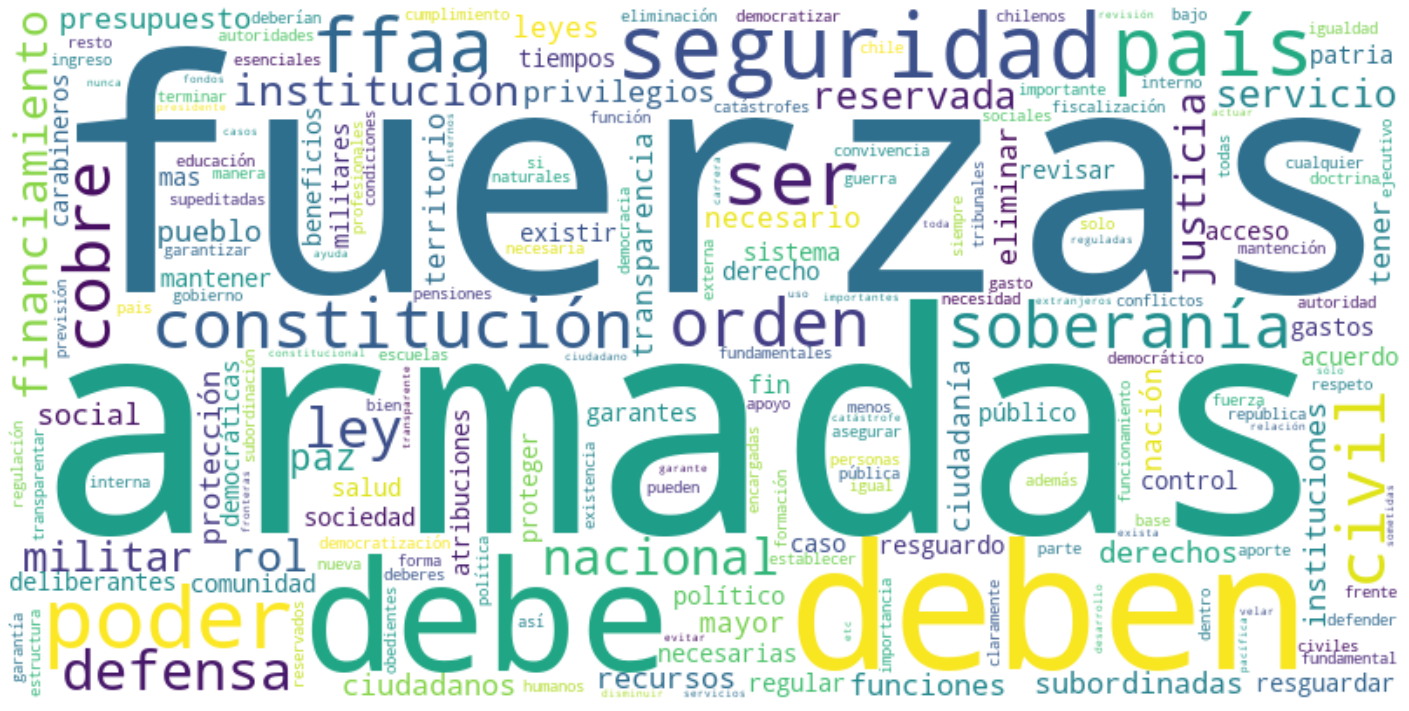

In [55]:
generate_word_cloud(word_count_map)

# WordCloud bigram raw

In [56]:
l_bigram = []
for chunk in institutions['fundamento']:
    for x in bigrams(word_tokenize(chunk)):
        l_bigram.append(x)
#l

In [57]:
word_count_bigram_map = {}
for i, j in l_bigram:
    if not (i in stopwords.words('spanish') or j in stopwords.words('spanish')):
        word_count_bigram_map[i + " " +j] = l_bigram.count((i, j))
#word_count_bigram_map

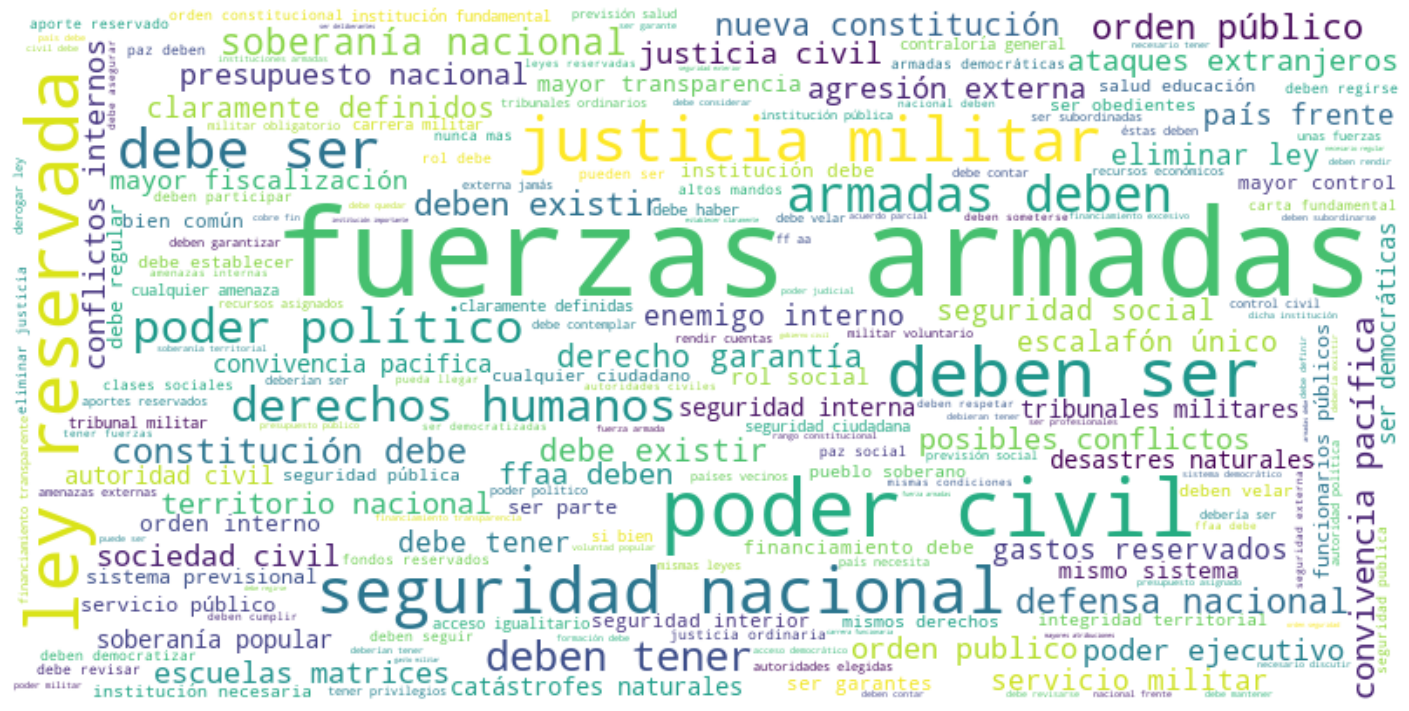

In [58]:
generate_word_cloud(word_count_bigram_map)

# WordCloud trigram raw

In [59]:
l_trigram = []
for chunk in institutions['fundamento']:
    a = nlp(chunk)
    for x in trigrams(a):
        l_trigram.append(x)
#l_trigram

In [60]:
word_count_trigram_map = {}
for i, j, k in l_trigram:
    if not (i.text in stopwords.words('spanish') and j.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (i.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (j.text in stopwords.words('spanish') and k.text in stopwords.words('spanish')) and \
        not (i.pos_ == "ADP" and j.pos_ == "ADP") and \
        not (j.pos_ == "ADP" and k.pos_ == "ADP") and \
        not (i.pos_ == "ADP" and j.pos_ == "DET") and \
        not (j.pos_ == "ADP" and k.pos_ == "DET") and \
        not (i.pos_ == "ADJ" and j.pos_ == "ADP") and \
        not (j.pos_ == "ADJ" and k.pos_ == "ADP") :

        word_count_trigram_map[i.text + " " + j.text + " " + k.text] = l_trigram.count((i, j, k))

#word_count_trigram_map

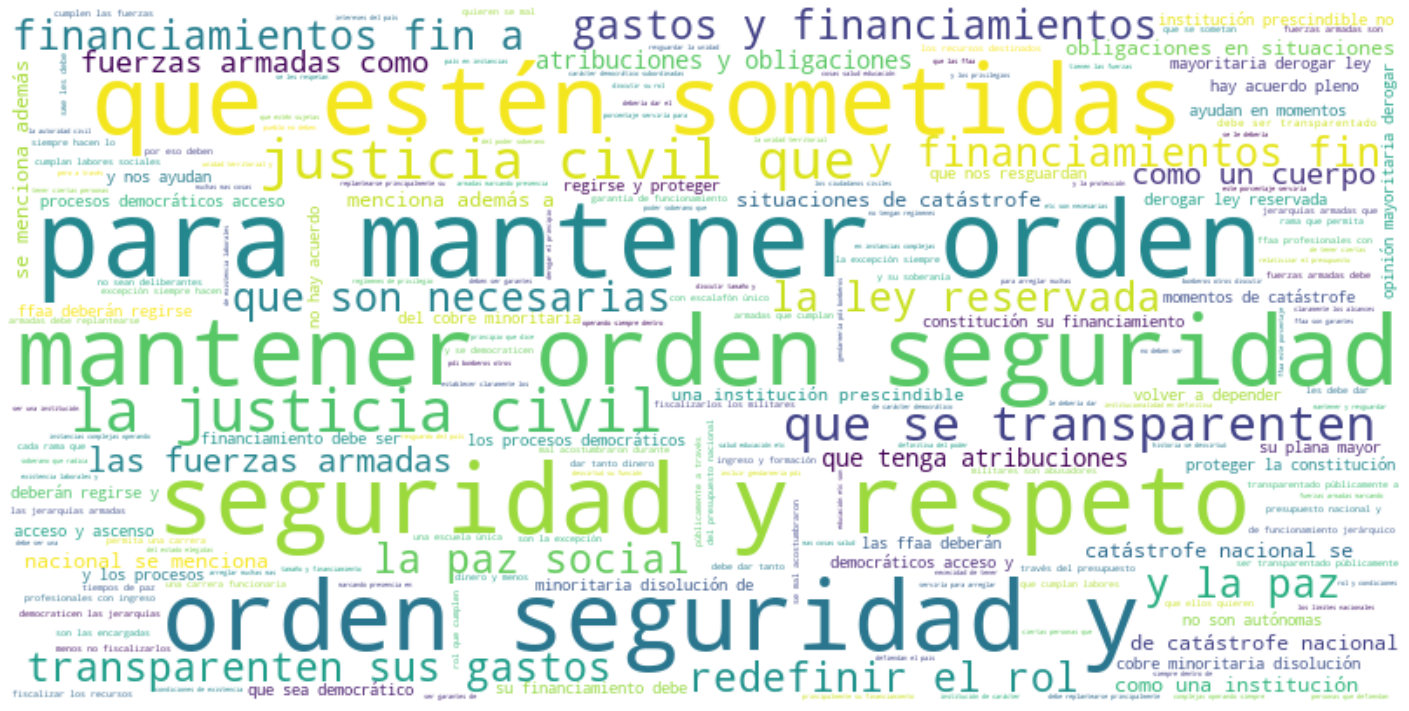

In [61]:
generate_word_cloud(word_count_trigram_map)

# WordCloud token/noun

In [62]:
words_noun = []
for x in institutions['fundamento']:
    for i in nlp(x):
        if (i.text not in stopwords.words('spanish')) and (i.pos_ == 'NOUN'):
            words_noun.append(i.lemma_)
#words_noun

In [63]:
word_count_map_noun = {}
for i in words:
    word_count_map_noun[i] = words_noun.count(i)
#word_count_map_noun

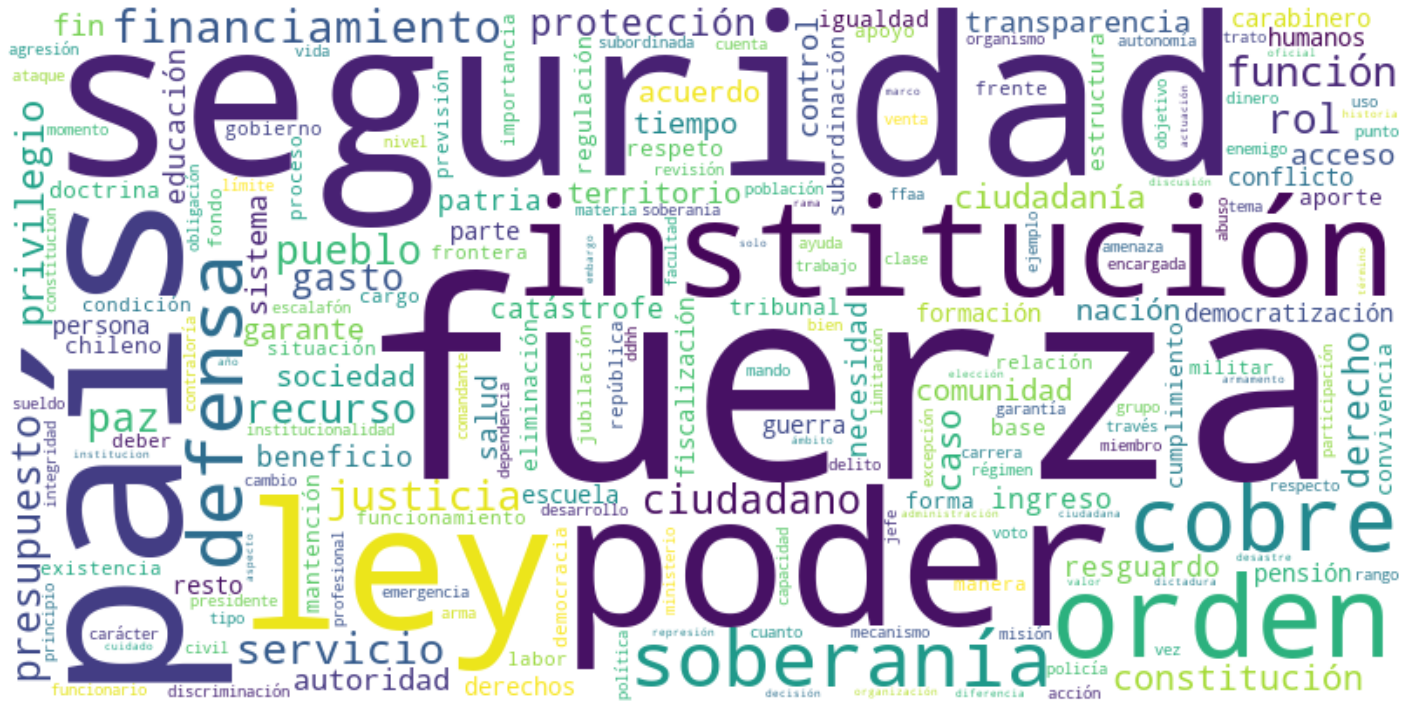

In [64]:
generate_word_cloud(word_count_map_noun)

# WordCloud bigram/noun-adj

In [65]:
l_bigram_nound_adj = []
for chunk in institutions['fundamento']:
    a = nlp(chunk)
    for t in bigrams(a):
        if (t[0].pos_ == 'NOUN') and (t[1].pos_ == 'ADJ') and \
                (t[0].text not in stopwords.words('spanish')) and \
                (t[1].text not in stopwords.words('spanish')):
            l_bigram_nound_adj.append(t)
#l_bigram_nound_adj

In [66]:
word_count_bigram_nound_adj_map = {}
for i, j in l_bigram_nound_adj:
    if not (i.text in stopwords.words('spanish') or j.text in stopwords.words('spanish')):
        word_count_bigram_nound_adj_map[i.text + " " +j.text] = l_bigram_nound_adj.count((i, j))
#word_count_bigram_map

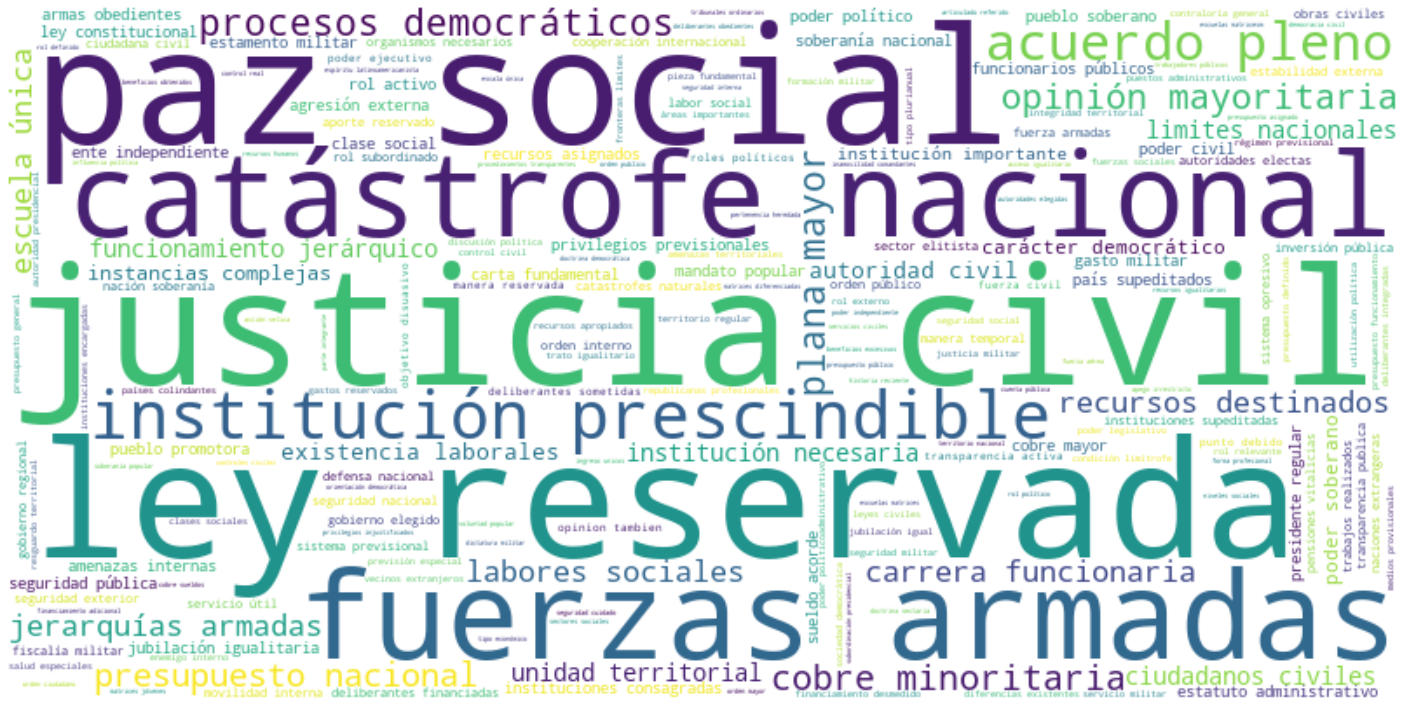

In [67]:
generate_word_cloud(word_count_bigram_nound_adj_map)

# WordCloud trigram/noun-prep-noun

In [68]:
l_trigram_noun_prep_noun = []
for chunk in institutions['fundamento']:
    for x in trigrams(nlp(chunk)):
        if (x[0].pos_ == 'NOUN' and x[1].dep_ == 'case' and x[2].pos_ == 'NOUN'):
            l_trigram_noun_prep_noun.append(x)

In [69]:
word_count_trigram_map_noun_prep_noun = {}
for i, j, k in l_trigram_noun_prep_noun:
    word_count_trigram_map_noun_prep_noun[i.text + " " + j.text + " " + k.text] = l_trigram.count((i, j, k)) if l_trigram.count((i, j, k)) > 0 else 1

#word_count_trigram_map_noun_prep_noun

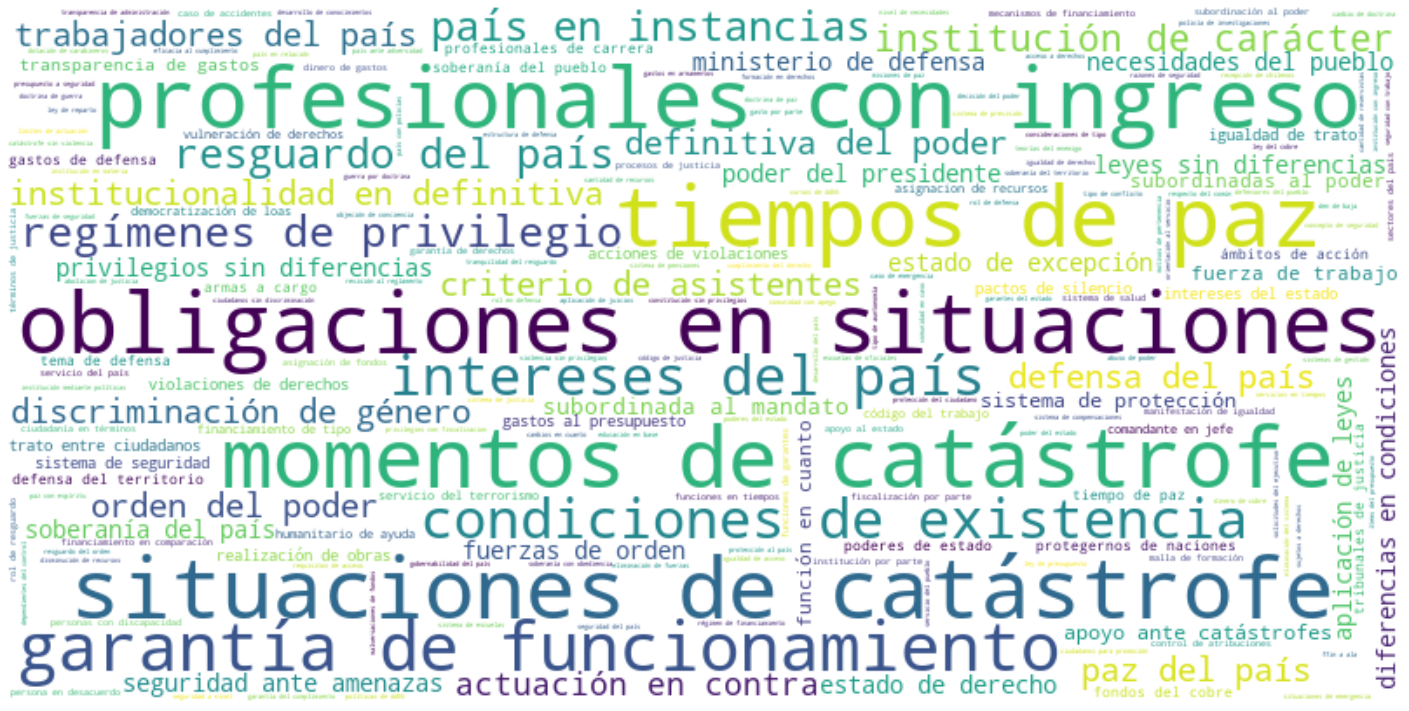

In [70]:
#word_count_trigram_map
generate_word_cloud(word_count_trigram_map_noun_prep_noun)

In [139]:
g = nx.DiGraph()
con = 0
for n in sorted(word_count_bigram_map, key=word_count_bigram_map.get, reverse=True):
    llll = n.split()
    g.add_edge(llll[0],llll[1])
    con = con + 1
    if con == 50:
        break

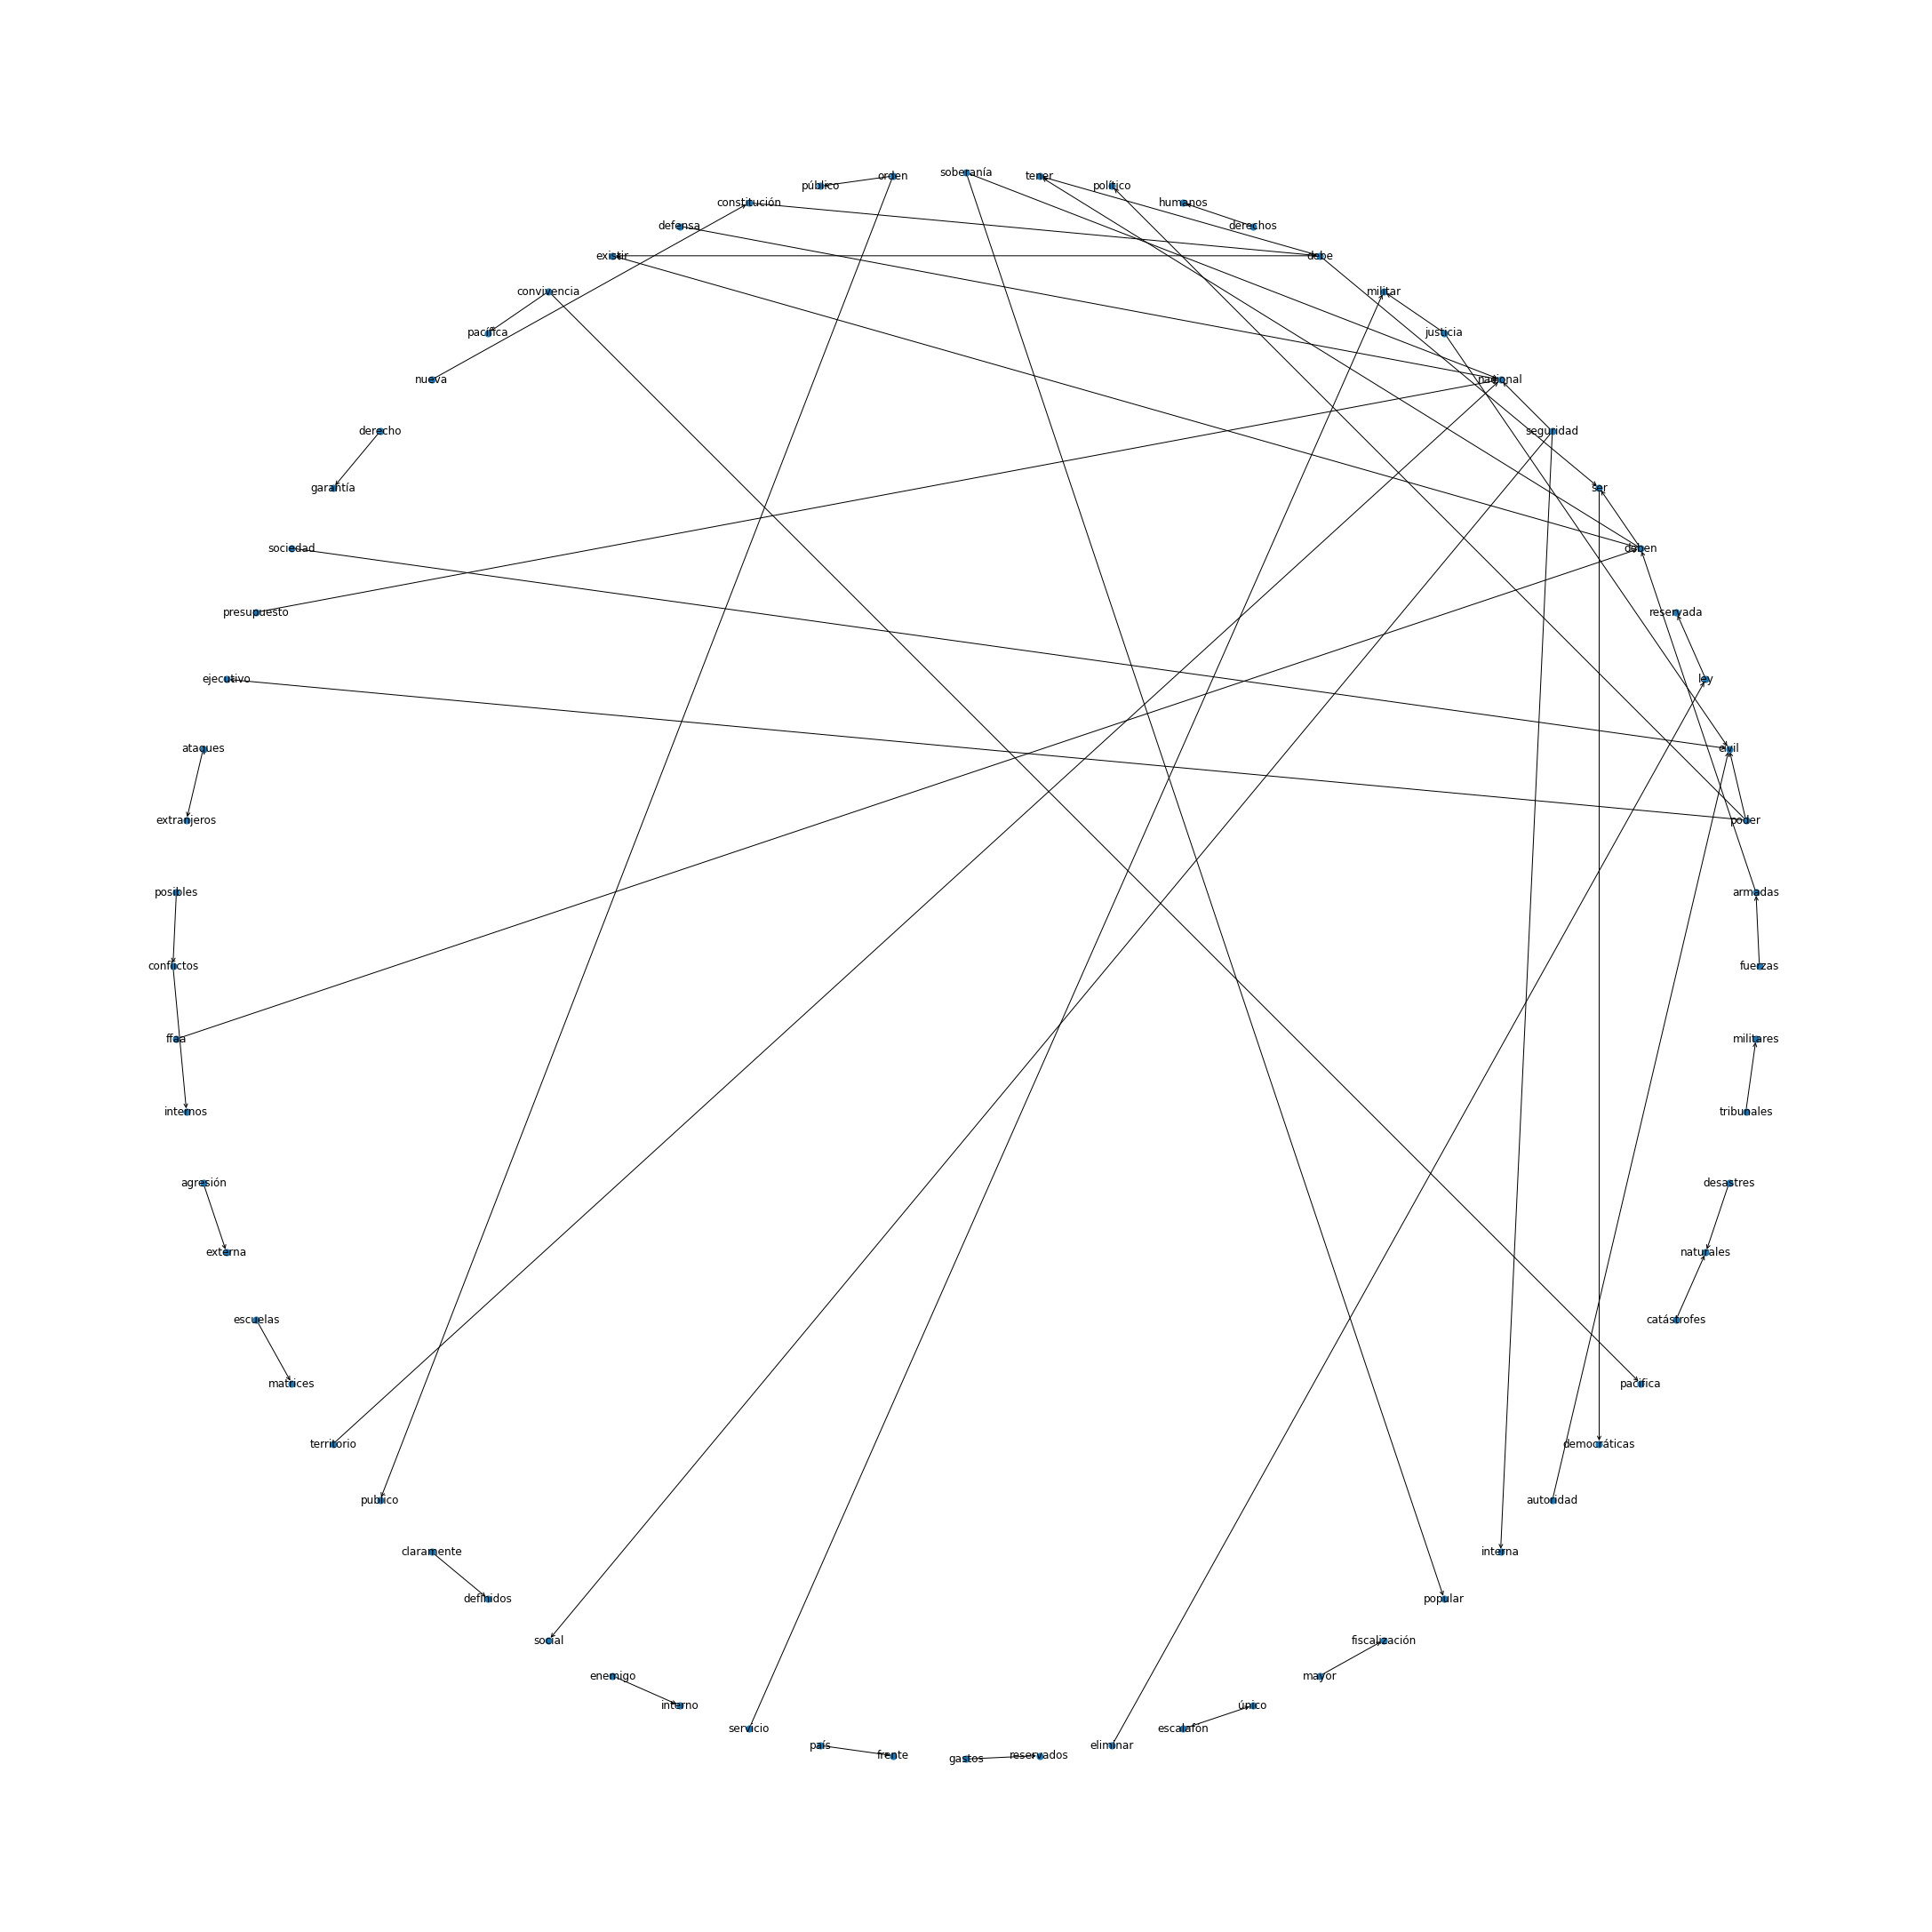

In [141]:
fig = plt.figure(figsize=(30, 30))
nx.draw_circular(g, node_size=50, with_labels=True, arrowstyle="->")

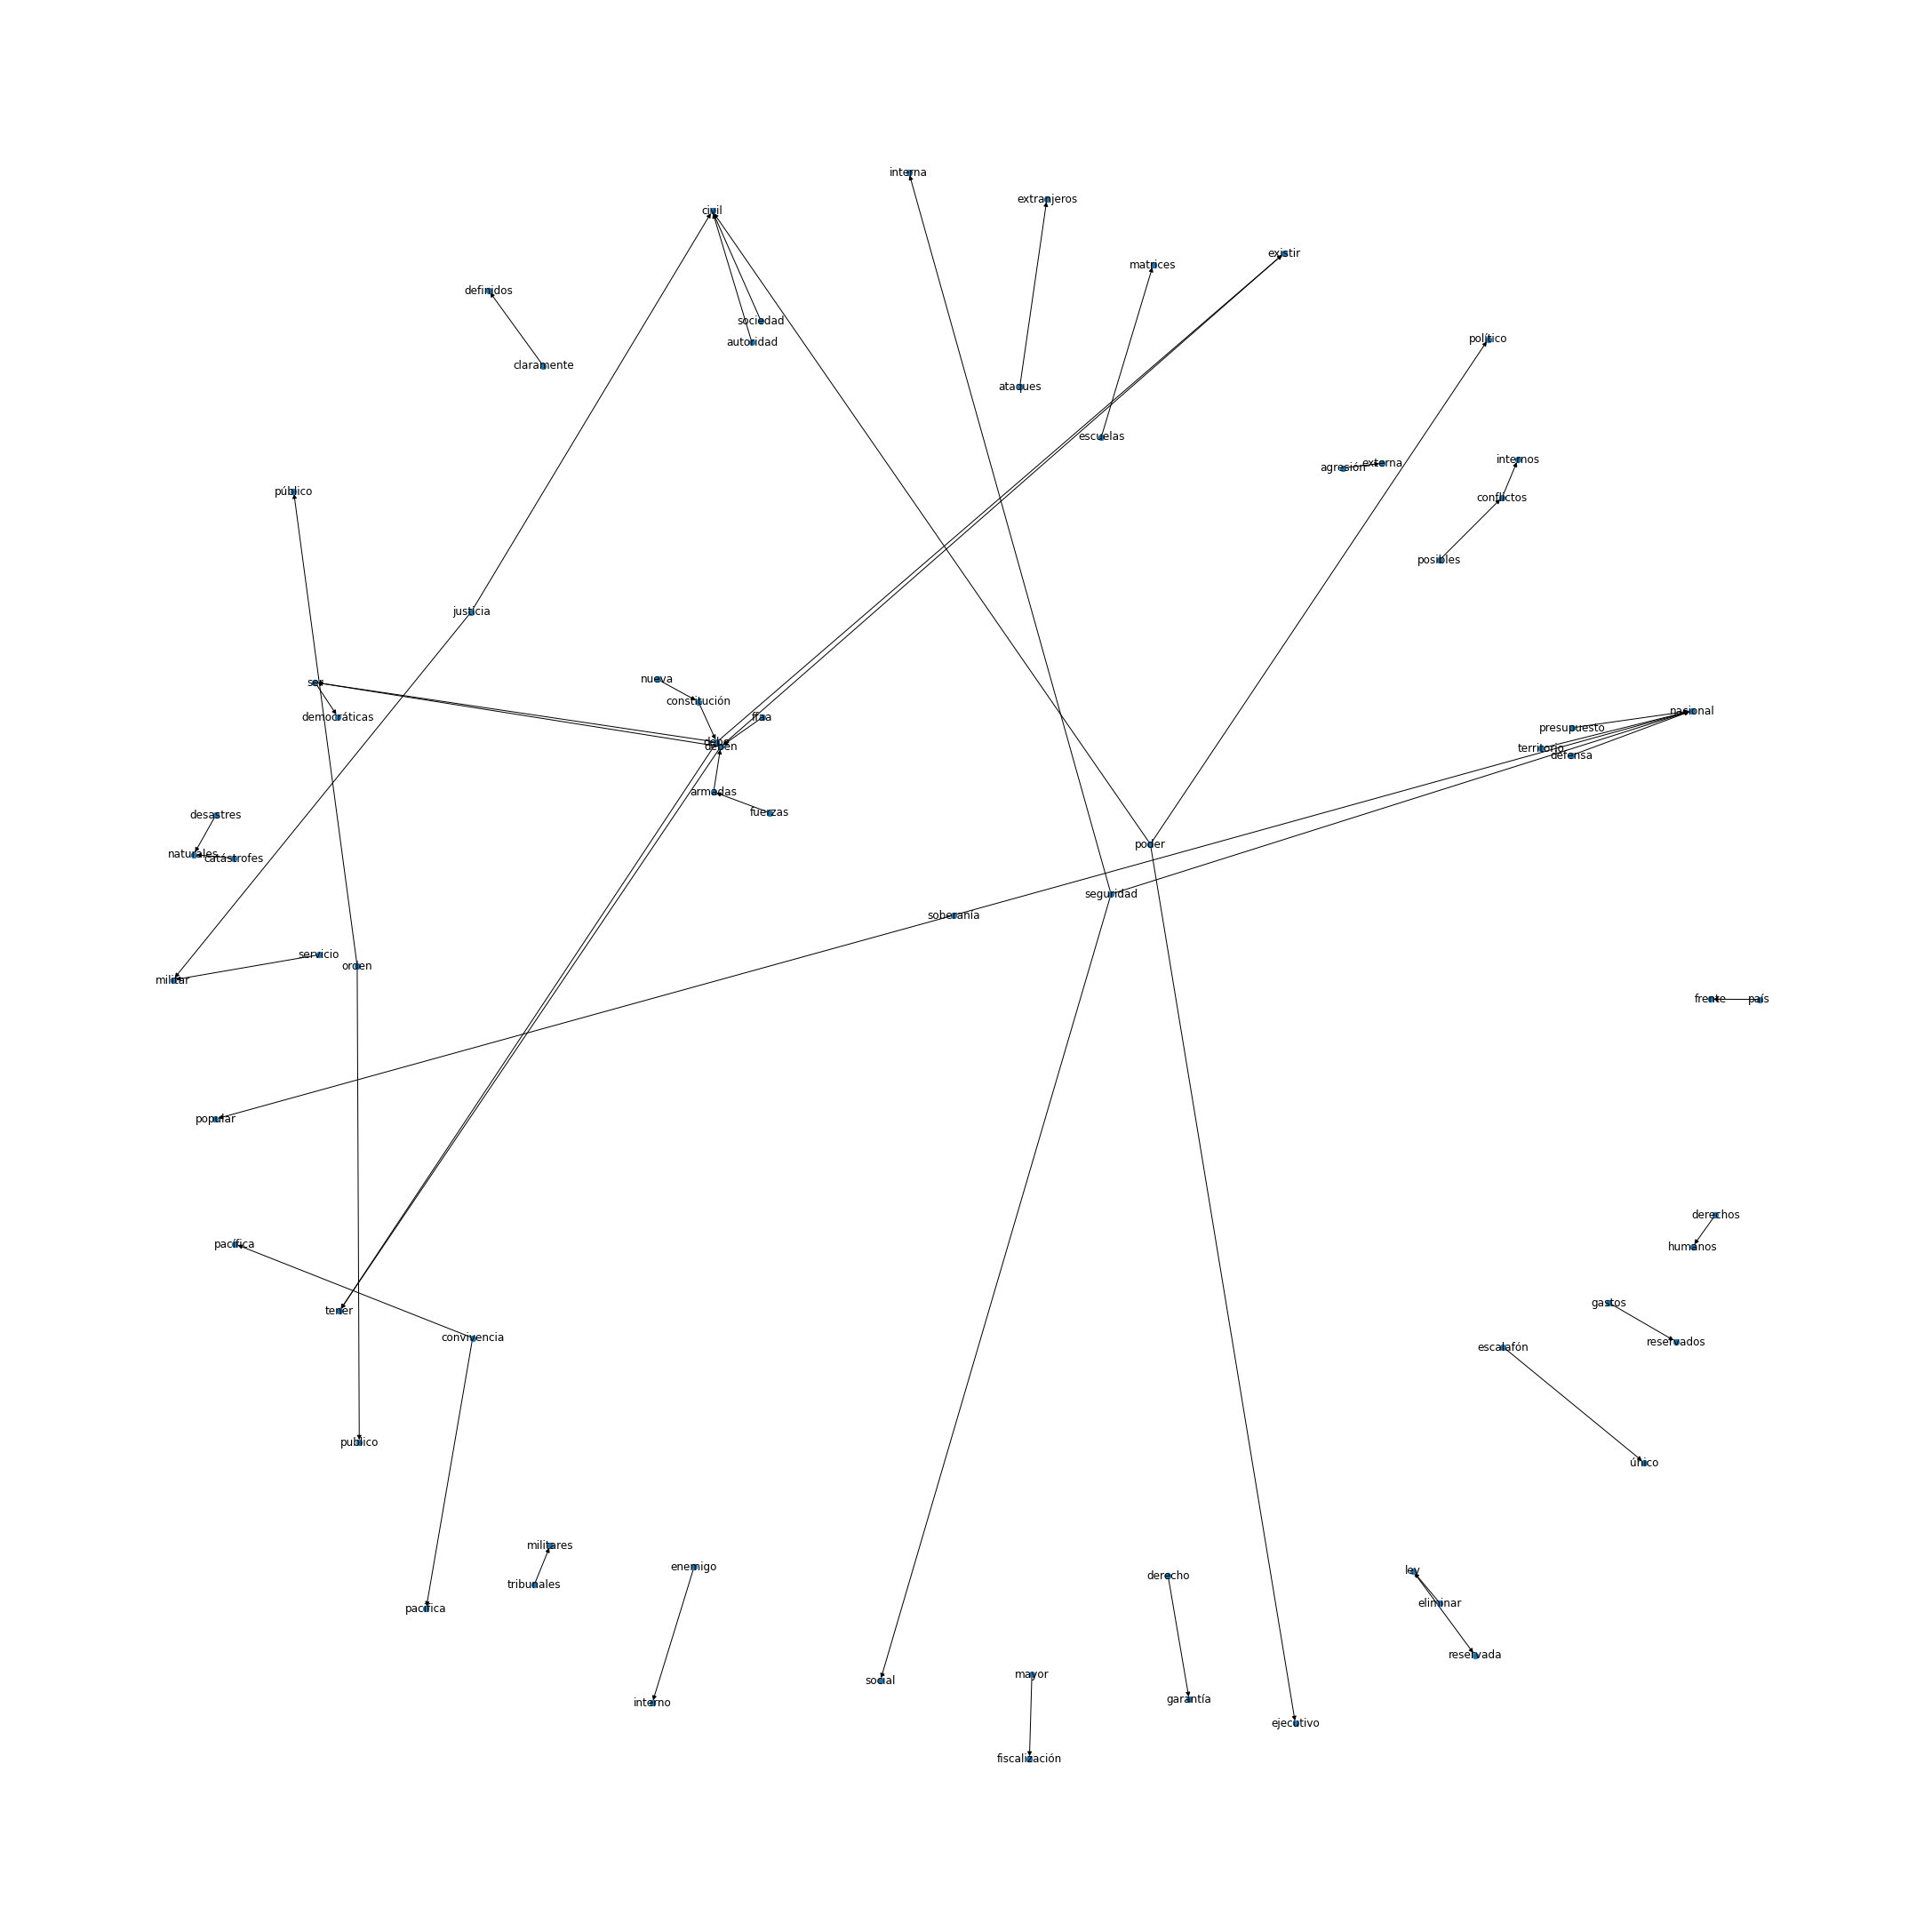

In [143]:
fig = plt.figure(figsize=(30, 30))
nx.draw_spring(g, node_size=40, with_labels=True)